## Convolutional Neural Network Classificaiton - MNIST dataset

In [32]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np 

In [33]:
tf.__version__, keras.__version__, matplotlib.__version__, np.__version__

('2.17.0', '3.5.0', '3.9.2', '1.26.4')

In [34]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [37]:
X_train.max()

255

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Class 1')

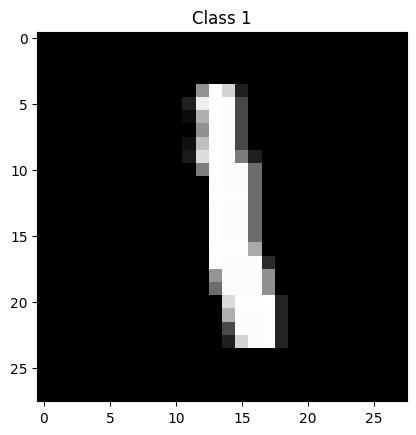

In [39]:
# seeing some images

plt.imshow(X_train[6], cmap='gray')
plt.title('Class ' + str(y_train[6]))

In [40]:
X_train.shape[0]

60000

In [41]:
# 1 indicates de amount of channels of the images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)


In [42]:
X_train.shape

(60000, 28, 28, 1)

In [43]:
X_train = X_train.astype('float32')


In [44]:
# normalization

X_train /= 255

In [45]:
X_test.shape[0]

10000

In [46]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')
X_test /= 255
X_test.shape

(10000, 28, 28, 1)

In [47]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, 0.0, 1.0)

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
# number of classes is 10
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [50]:
model = Sequential()
model.add(InputLayer(shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,642 (443.91 KB)

 Trainable params: 113,514 (443.41 KB)

 Non-trainable params: 128 (512.00 B)

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8789 - loss: 0.3868 - val_accuracy: 0.9647 - val_loss: 0.1382
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9839 - loss: 0.0515 - val_accuracy: 0.9881 - val_loss: 0.0367
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9899 - val_loss: 0.0327
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9904 - val_loss: 0.0329
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9885 - val_loss: 0.0366


In [53]:
'''  

  where did 469 came from?
  60000(total of images) / 128 (amount of batches) ~ 469
  
'''

'  \n\n  where did 469 came from?\n  60000(total of images) / 128 (amount of batches) ~ 469\n  \n'

In [54]:
results = model.evaluate(X_test, y_test)
results # error and accuracy


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0496


[0.03656131774187088, 0.9884999990463257]